In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl


# Holdings of the ECB by sector

In [3]:
#data from https://www.ecb.europa.eu/mopo/implement/app/html/index.en.html#cspp
df= pd.read_csv("https://raw.githubusercontent.com/NinaMorgenstern/ECB-Bond-Purchases/main/Industry.csv",parse_dates=['Quartal'], thousands=',')
df.info()
df['Total Holdings']=df['Total Holdings']/1000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Quartal                            8 non-null      datetime64[ns]
 1   Utilities                          8 non-null      object        
 2   Infrastructure and transportation  8 non-null      object        
 3   Automotive and parts               8 non-null      object        
 4   Telecommunication                  8 non-null      object        
 5   Energy and basic resources         8 non-null      object        
 6   Construction and materials         8 non-null      object        
 7   Real estate                        8 non-null      object        
 8   Beverages                          8 non-null      object        
 9   Technology                         8 non-null      object        
 10  Chemicals                          8 non-n

In [4]:
df['Utilities'] = df['Utilities'].str.rstrip('%').astype('float') / 100.0
df['Infrastructure and transportation'] = df['Infrastructure and transportation'].str.rstrip('%').astype('float') / 100.0
df['Automotive and parts'] = df['Automotive and parts'].str.rstrip('%').astype('float') / 100.0
df['Telecommunication'] = df['Telecommunication'].str.rstrip('%').astype('float') / 100.0
df['Energy and basic resources'] = df['Energy and basic resources'].str.rstrip('%').astype('float') / 100.0
df['Construction and materials'] = df['Construction and materials'].str.rstrip('%').astype('float') / 100.0
df['Real estate'] = df['Real estate'].str.rstrip('%').astype('float') / 100.0
df['Beverages'] = df['Beverages'].str.rstrip('%').astype('float') / 100.0
df['Technology'] = df['Technology'].str.rstrip('%').astype('float') / 100.0
df['Chemicals'] = df['Chemicals'].str.rstrip('%').astype('float') / 100.0
df['Health care and life science'] = df['Health care and life science'].str.rstrip('%').astype('float') / 100.0
df['Insurance'] = df['Insurance'].str.rstrip('%').astype('float') / 100.0
df['Other sectors'] = df['Other sectors'].str.rstrip('%').astype('float') / 100.0
df['Food2'] = 0.04

In [5]:
df

,Quartal,Utilities,Infrastructure and transportation,Automotive and parts,Telecommunication,Energy and basic resources,Construction and materials,Real estate,Beverages,Technology,Chemicals,Health care and life science,Food,Insurance,Other sectors,Total Holdings,Food2
0,2017-09-30,0.16,0.12,0.10,0.09,0.07,0.06,0.06,0.05,0.05,0.05,0.05,4%,0.03,0.08,114.658,0.04
1,2018-03-31,0.15,0.11,0.09,0.09,0.06,0.06,0.06,0.06,0.05,0.05,0.05,4%,0.03,0.09,148.702,0.04
2,2018-09-30,0.15,0.11,0.09,0.09,0.06,0.06,0.06,0.06,0.05,0.05,0.04,4%,0.03,0.09,170.378,0.04
3,2019-03-31,0.15,0.11,0.09,0.09,0.06,0.06,0.06,0.06,0.05,0.05,0.04,4%,0.03,0.09,177.700,0.04
4,2019-09-30,0.15,0.12,0.09,0.09,0.06,0.06,0.06,0.06,0.05,0.05,0.04,4%,0.03,0.09,176.937,0.04
5,2020-03-31,0.16,0.11,0.09,0.09,0.06,0.07,0.05,0.07,0.04,0.06,0.04,4%,0.03,0.09,201.507,0.04
6,2020-09-30,0.15,0.11,0.09,0.08,0.06,0.07,0.05,0.08,0.05,0.07,0.04,4%,0.02,0.09,236.349,0.04
7,2021-03-31,0.15,0.11,0.09,0.08,0.06,0.08,0.05,0.08,0.04,0.07,0.04,4%,0.02,0.09,266.060,0.04


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Quartal                            8 non-null      datetime64[ns]
 1   Utilities                          8 non-null      float64       
 2   Infrastructure and transportation  8 non-null      float64       
 3   Automotive and parts               8 non-null      float64       
 4   Telecommunication                  8 non-null      float64       
 5   Energy and basic resources         8 non-null      float64       
 6   Construction and materials         8 non-null      float64       
 7   Real estate                        8 non-null      float64       
 8   Beverages                          8 non-null      float64       
 9   Technology                         8 non-null      float64       
 10  Chemicals                          8 non-n

## Sector Holdings over time

<bound method _AxesBase.grid of <AxesSubplot:title={'center':'CSPP Program'}, xlabel='Date', ylabel='Percent of held Assets'>>

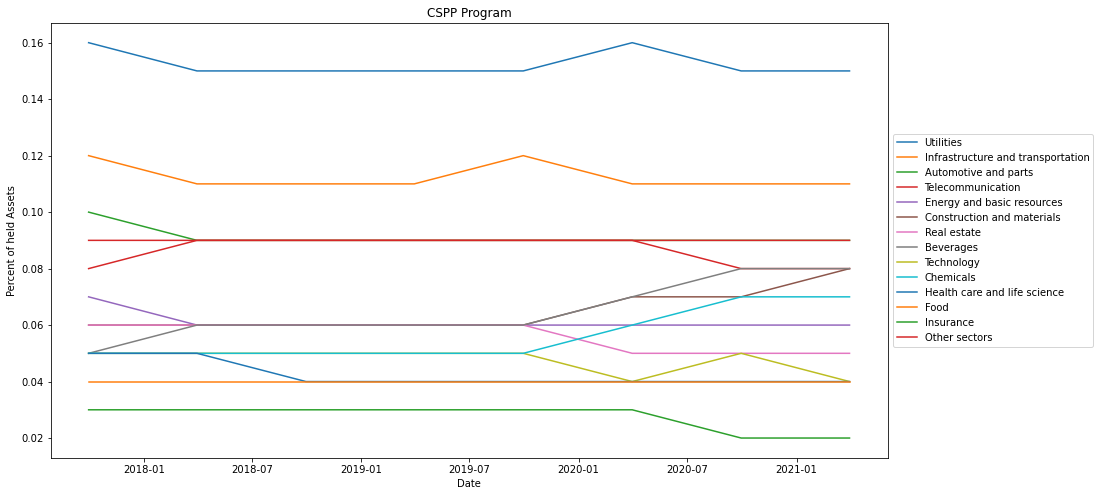

In [8]:
#plot of the percent
fig = plt.figure(figsize=(15, 8))
ax = plt.axes()
ax.plot(df['Quartal'], df['Utilities'], label = "Utilities")
ax.plot(df['Quartal'], df['Infrastructure and transportation'], label = "Infrastructure and transportation")
ax.plot(df['Quartal'], df['Automotive and parts'], label = "Automotive and parts")
ax.plot(df['Quartal'], df['Telecommunication'], label = "Telecommunication")
ax.plot(df['Quartal'], df['Energy and basic resources'], label = "Energy and basic resources")
ax.plot(df['Quartal'], df['Construction and materials'], label = "Construction and materials")
ax.plot(df['Quartal'], df['Real estate'], label = "Real estate")
ax.plot(df['Quartal'], df['Beverages'], label = "Beverages")
ax.plot(df['Quartal'], df['Technology'], label = "Technology")
ax.plot(df['Quartal'], df['Chemicals'], label = "Chemicals")
ax.plot(df['Quartal'], df['Health care and life science'], label = "Health care and life science")
ax.plot(df['Quartal'], df['Food2'], label = "Food")
ax.plot(df['Quartal'], df['Insurance'], label = "Insurance")
ax.plot(df['Quartal'], df['Other sectors'], label = "Other sectors")
ax.set(xlabel='Date', ylabel='Percent of held Assets',
       title='CSPP Program');
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid

In [10]:
#calculate values in euro
df['Utilities_euro']=df['Utilities']*df['Total Holdings']
df['Infrastructure and transportation_euro']=df['Infrastructure and transportation']*df['Total Holdings']
df['Automotive and parts_euro']=df['Automotive and parts']*df['Total Holdings']
df['Telecommunication_euro']=df['Telecommunication']*df['Total Holdings']
df['Energy and basic resources_euro']=df['Energy and basic resources']*df['Total Holdings']
df['Construction and materials_euro']=df['Construction and materials']*df['Total Holdings']
df['Real estate_euro']=df['Real estate']*df['Total Holdings']
df['Beverages_euro']=df['Beverages']*df['Total Holdings']
df['Technology_euro']=df['Technology']*df['Total Holdings']
df['Chemicals_euro']=df['Chemicals']*df['Total Holdings']
df['Health care and life science_euro']=df['Health care and life science']*df['Total Holdings']
df['Insurance_euro']=df['Insurance']*df['Total Holdings']
df['Other sectors_euro']=df['Other sectors']*df['Total Holdings']
df['Food_euro']=df['Food2']*df['Total Holdings']

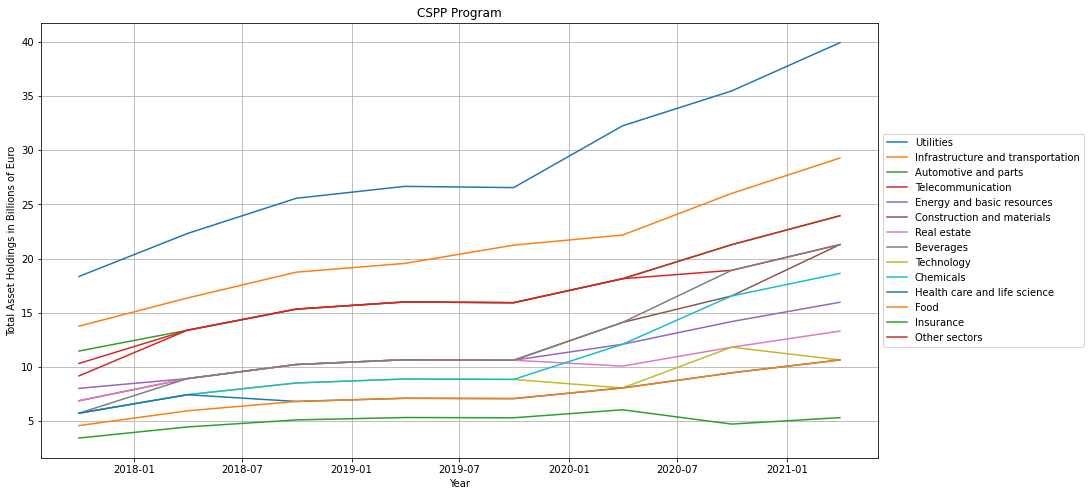

In [34]:
#plot in euro
fig = plt.figure(figsize=(15, 8))
ax = plt.axes()
ax.plot(df['Quartal'], df['Utilities_euro'], label = "Utilities")
ax.plot(df['Quartal'], df['Infrastructure and transportation_euro'], label = "Infrastructure and transportation")
ax.plot(df['Quartal'], df['Automotive and parts_euro'], label = "Automotive and parts")
ax.plot(df['Quartal'], df['Telecommunication_euro'], label = "Telecommunication")
ax.plot(df['Quartal'], df['Energy and basic resources_euro'], label = "Energy and basic resources")
ax.plot(df['Quartal'], df['Construction and materials_euro'], label = "Construction and materials")
ax.plot(df['Quartal'], df['Real estate_euro'], label = "Real estate")
ax.plot(df['Quartal'], df['Beverages_euro'], label = "Beverages")
ax.plot(df['Quartal'], df['Technology_euro'], label = "Technology")
ax.plot(df['Quartal'], df['Chemicals_euro'], label = "Chemicals")
ax.plot(df['Quartal'], df['Health care and life science_euro'], label = "Health care and life science")
ax.plot(df['Quartal'], df['Food_euro'], label = "Food")
ax.plot(df['Quartal'], df['Insurance_euro'], label = "Insurance")
ax.plot(df['Quartal'], df['Other sectors_euro'], label = "Other sectors")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(xlabel='Year', ylabel='Total Asset Holdings in Billions of Euro',
       title='CSPP Program');

## Emissions of the sectors

In [14]:
#Read in dataset that gives emissions by sector
#data from EEA https://www.eea.europa.eu/data-and-maps/data/data-viewers/greenhouse-gases-viewer
Emissions= pd.read_csv('https://raw.githubusercontent.com/NinaMorgenstern/ECB-Bond-Purchases/main/greenhouse-gas-emissions-in-the-eu-28-1990-2018-by-sector.csv',parse_dates=['year'], thousands=',')
Emissions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   year                    29 non-null     datetime64[ns]
 1   Energy supply           29 non-null     float64       
 2   Transport               29 non-null     float64       
 3   Industry                29 non-null     float64       
 4   Agriculture             29 non-null     float64       
 5   Residential/commercial  29 non-null     float64       
 6   International shipping  29 non-null     float64       
 7   International aviation  29 non-null     float64       
 8   Waste                   29 non-null     float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 2.2 KB


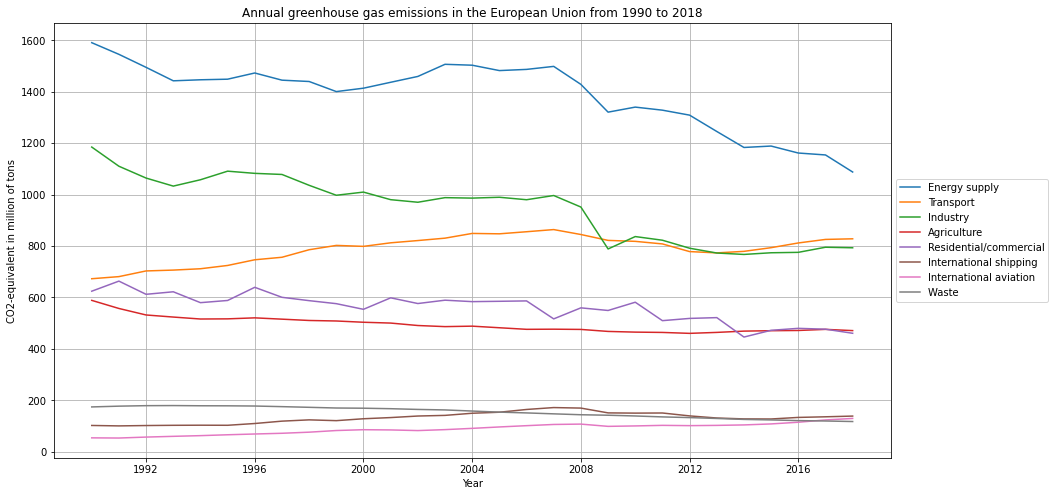

In [33]:
#Figure to see emissions over time in the EU by sector
fig = plt.figure(figsize=(15, 8))
ax = plt.axes()
ax.plot(Emissions['year'], Emissions['Energy supply'], label = "Energy supply")
ax.plot(Emissions['year'], Emissions['Transport'], label = "Transport")
ax.plot(Emissions['year'], Emissions['Industry'], label = "Industry")
ax.plot(Emissions['year'], Emissions['Agriculture'], label = "Agriculture")
ax.plot(Emissions['year'], Emissions['Residential/commercial'], label = "Residential/commercial")
ax.plot(Emissions['year'], Emissions['International shipping'], label = "International shipping ")
ax.plot(Emissions['year'], Emissions['International aviation'], label = "International aviation")
ax.plot(Emissions['year'], Emissions['Waste'], label = "Waste ")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(xlabel='Year', ylabel='CO2-equivalent in million of tons',
       title='Annual greenhouse gas emissions in the European Union from 1990 to 2018');


In [37]:
#Bar chart for the emissions in the EU in 2018 (most recent data I could find)
# create a dataset
co2 = [1087.8, 828, 793.1, 470.9, 460.5, 138.4, 129.2, 117.2];
bars = ("Energy supply", "Transport", "Industry", "Agriculture", "Residential/commercial", "International shipping", "International aviation", "Waste");
x_pos = np.arange(len(bars));

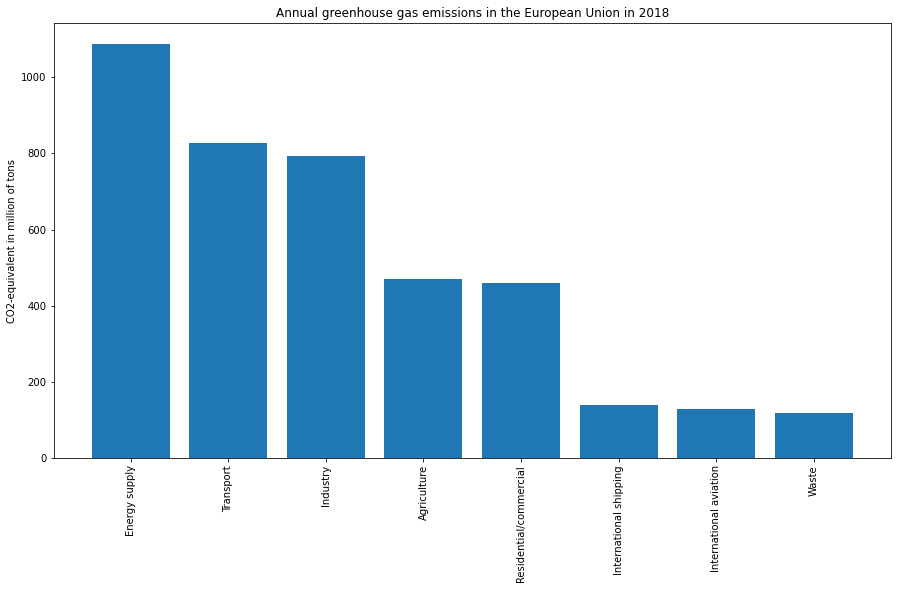

In [41]:
# Create bars
fig = plt.figure(figsize=(15, 8))
ax = plt.axes()
ax.bar(x_pos, co2);
ax.set(ylabel='CO2-equivalent in million of tons',
       title='Annual greenhouse gas emissions in the European Union in 2018');
# Create names on the x-axis
ax.set_xticks(x_pos);
ax.set_xticklabels(bars, rotation='vertical');